<a href="https://colab.research.google.com/github/junhansong/006958/blob/master/colab_22_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
30/30 [==============================] - 107s 4s/step - loss: 0.6864 - accuracy: 0.5733 - val_loss: 0.6839 - val_accuracy: 0.5200
Epoch 2/50
30/30 [==============================] - 19s 642ms/step - loss: 0.6863 - accuracy: 0.5333 - val_loss: 0.6756 - val_accuracy: 0.6000
Epoch 3/50
30/30 [==============================] - 10s 329ms/step - loss: 0.6733 - accuracy: 0.6000 - val_loss: 0.6742 - val_accuracy: 0.5200
Epoch 4/50
30/30 [==============================] - 7s 244ms/step - loss: 0.6767 - accuracy: 0.5400 - val_loss: 0.6636 - val_accuracy: 0.5400
Epoch 5/50
30/30 [==============================] - 5s 157ms/step - loss: 0.6320 - accuracy: 0.6733 - val_loss: 0.6745 - val_accuracy: 0.5600
Epoch 6/50
30/30 [==============================] - 3s 99ms/step - loss: 0.6505 - accuracy: 0.6133 - val_loss: 0.6063 - val_accurac

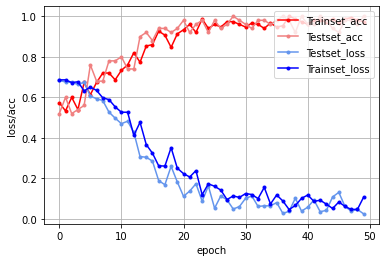

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       './drive/My Drive/Colab Notebooks/colab_train_test/train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       './drive/My Drive/Colab Notebooks/colab_train_test/test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행합니다
history = model.fit_generator(
       train_generator,
       steps_per_epoch=30,  #적절한 값으로 조절합니다.
       epochs=50,   #적절한 값으로 조절합니다.
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
